<a href="https://colab.research.google.com/github/rafflds/Challenger_Data_Science_Alura/blob/main/Challenger_Data_Science_Alura_2023_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>Material de Referência

* https://sparkbyexamples.com/pyspark/pyspark-where-filter/

* https://cursos.alura.com.br/course/spark-trabalhando-regressao/task/108188

## <font color=purple>Instalando e importando Pyspark

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession

# Criando objeto
SP = SparkSession.builder.appName('analise').getOrCreate()

## <font color=purple>Análise Exploratória

### **Leitura da base de dados Parquet**

In [ ]:
dados = SP.read.parquet(
    '/content/drive/MyDrive/Colab Notebooks/Spark/imoveis/parquet'
)

dados.show(5, False)

+-----+----------+---------+---------+----------------------------------------------------------------------------------------------------------------------+-------+------+------------+------------+-----------+----+---------+----------+----------+----+-----+-----+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                       |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro   |zona      |condominio|iptu|tipo |valor|
+-----+----------+---------+---------+----------------------------------------------------------------------------------------------------------------------+-------+------+------------+------------+-----------+----+---------+----------+----------+----+-----+-----+
|3    |43        |43       |1        |Academia,Churrasqueira,Playground,Salão de festas,Condomínio fechado,Portão eletrônico,Portaria 24h,Animais permitidos|2      |null  |Usado       |Apartamento |Residen

### **Seleção de Features**

* Algumas colunas possuem apenas um único valor. Essas colunas estão dessa forma devido aos filtros que foram realizados na base de dados durante a semana 1. Dessa forma, nós podemos excluir essas colunas, pois como possuem apenas um valor não serão relevantes para o modelo.

* Analise as colunas **area_total** e **area_util**. Essas colunas parecem ter muitos valores iguais, será necessário deixar as duas colunas no nosso DataFrame? 

* Qual delas possui **mais dados nulos**?

In [ ]:
dados = dados.drop('tipo_unidade','tipo_anuncio','tipo_uso','tipo')
dados.show(5)

+-----+----------+---------+---------+--------------------+-------+------+----+---------+----------+----------+----+-----+
|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|vaga|   bairro|      zona|condominio|iptu|valor|
+-----+----------+---------+---------+--------------------+-------+------+----+---------+----------+----------+----+-----+
|    3|        43|       43|        1|Academia,Churrasq...|      2|  null|   1|Paciência|Zona Oeste|       245|    |15000|
|    2|        42|       42|        1|Churrasqueira,Pla...|      2|  null|   1|Paciência|Zona Oeste|         0|   0|15000|
|    1|        41|       41|        1|Portaria 24h,Cond...|      2|  null|   1|Guaratiba|Zona Oeste|         0|   0|20000|
|    3|        43|       43|        1|Churrasqueira,Pis...|      2|  null|   0|   Cosmos|Zona Oeste|       285|    |20000|
|    2|        43|       43|        1|Academia,Churrasq...|      2|  null|   1|Guaratiba|Zona Oeste|       245|    |15000|
+-----+---------

**As duas variáveis são iguais, excluir a que tiver mais valores nulos**

In [ ]:
dados.select("area_total","area_util").show()

+----------+---------+
|area_total|area_util|
+----------+---------+
|        43|       43|
|        42|       42|
|        41|       41|
|        43|       43|
|        43|       43|
|        43|       43|
|        43|       43|
|        43|       43|
|        43|       43|
|        43|       43|
|        60|       60|
|        43|       43|
|        43|       43|
|        43|       43|
|        43|       43|
|        55|       55|
|        45|       45|
|        42|       42|
|        43|       43|
|      null|       55|
+----------+---------+
only showing top 20 rows



**Verificar os valores null**

In [ ]:
from pyspark.sql import functions as f

In [ ]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-----+----------+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+
|andar|area_total|area_util|banheiros|caracteristicas|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+-----+----------+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+
|    0|      9187|      126|       70|              0|    101|  5523|3030|     0|   0|         0|   0|    0|
+-----+----------+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+



**Apagando variável com maior valor de nulos**

In [ ]:
dados = dados.drop('area_total')

### **Converter os tipos das colunas**

* Podemos converter o tipo de colunas numéricas, como "**andar**", "**banheiros**", "**suites**" e "**quartos**" para o tipo **inteiro**. 

* Além disso também pode ser necessário converter as colunas "**area_util**", "**condominio**", "**iptu**" e "**valor**" para o tipo **double**.

In [ ]:
dados.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- valor: string (nullable = true)



In [ ]:
from  pyspark.sql.functions  import  col, concat_ws

dados = dados\
  .withColumn("andar", col("andar").cast("Integer"))\
  .withColumn("area_util", col("area_util").cast("Double"))\
  .withColumn("condominio", col("condominio").cast("Double"))\
  .withColumn("iptu", col("iptu").cast("Double"))\
  .withColumn("valor", col("valor").cast("Double"))  

In [ ]:
dados.printSchema()

root
 |-- andar: integer (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- valor: double (nullable = true)



### **Verificar a variável características**

In [ ]:
dados.select("caracteristicas").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------+
|caracteristicas                                                                                                                        |
+---------------------------------------------------------------------------------------------------------------------------------------+
|Academia,Churrasqueira,Playground,Salão de festas,Condomínio fechado,Portão eletrônico,Portaria 24h,Animais permitidos                 |
|Churrasqueira,Playground,Salão de festas,Condomínio fechado,Portão eletrônico,Portaria 24h,Animais permitidos                          |
|Portaria 24h,Condomínio fechado,Playground,Salão de festas,Churrasqueira,Portão eletrônico                                             |
|Churrasqueira,Piscina,Playground,Salão de festas,Condomínio fechado,Portão eletrônico,Portaria 24h,Animais permitidos                  |
|Academia,Churrasqueira,Playground

### **Tratamento de valores nulos**

**Substituir os valores nulos**

In [ ]:
dados = dados.na.fill(0)
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-----+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+
|andar|area_util|banheiros|caracteristicas|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+-----+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+
|    0|        0|        0|              0|      0|     0|   0|     0|   0|         0|   0|    0|
+-----+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+



### **Tratamento da colunas do tipo caracteres**

In [ ]:
dados\
    .select('zona')\
    .groupBy('zona')\
    .count()\
    .show()

+------------+-----+
|        zona|count|
+------------+-----+
|  Zona Norte|11775|
|  Zona Oeste|32760|
|Zona Central| 1121|
|    Zona Sul|20426|
|            |   11|
+------------+-----+



**Se livra desses dados com string em branco**

In [ ]:
dados = dados\
    .where(f.col('zona')!= '')

In [ ]:
dados\
    .select('zona')\
    .groupBy('zona')\
    .count()\
    .show()

+------------+-----+
|        zona|count|
+------------+-----+
|  Zona Norte|11775|
|  Zona Oeste|32760|
|Zona Central| 1121|
|    Zona Sul|20426|
+------------+-----+



**Veficar o valores de bairro**

### **Preparação de dados para Machine Learning**

> Para conseguirmos utilizar nossos dados em modelos de Machine Learning, é necessário realizarmos algumas técnicas, como a transformação de variáveis categóricas em binárias.

* **caracteristica, zona**

### **Processo Dummy**

In [ ]:
zona = dados\
    .groupby('zona')\
    .pivot('zona')\
    .agg(f.lit(1))\
    .na\
    .fill(0)  

zona.show()  

+------------+------------+----------+----------+--------+
|        zona|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+------------+------------+----------+----------+--------+
|  Zona Norte|           0|         1|         0|       0|
|  Zona Oeste|           0|         0|         1|       0|
|Zona Central|           1|         0|         0|       0|
|    Zona Sul|           0|         0|         0|       1|
+------------+------------+----------+----------+--------+



**Unir a transformação das string ao dataset**

In [ ]:
dados = dados\
    .join(zona, how='inner')\
    .drop('zona','caracteristicas', 'bairro')

dados.limit(3).show()

+-----+---------+---------+-------+------+----+----------+----+-------+------------+----------+----------+--------+
|andar|area_util|banheiros|quartos|suites|vaga|condominio|iptu|  valor|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+-----+---------+---------+-------+------+----+----------+----+-------+------------+----------+----------+--------+
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           0|         1|         0|       0|
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           0|         0|         1|       0|
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           1|         0|         0|       0|
+-----+---------+---------+-------+------+----+----------+----+-------+------------+----------+----------+--------+



## <font color=purple>Salvando a base de dados

In [ ]:
dados.write.parquet(
    path='/content/drive/MyDrive/Colab Notebooks/Spark/imoveis_part2/parquet',
    mode='overwrite'
)

## <font color=purple>Preparação o modelo Machine Learning

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Mudar o nome da variável 'valor' p/ 'label'
dados = dados.withColumnRenamed('valor','label')

**Visualizar as colunas do dataset**

In [ ]:
dados.columns

['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'label',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

**Salvar as variáveis em uma nova**

In [ ]:
x = ['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

# Armazenar o valores da variável x, na coluna com nome de 'features'
assembler = VectorAssembler(inputCols = x, outputCol = 'features')

In [ ]:
df = assembler.transform(dados).select('features', 'label')
df.show(10, truncate=False)

+----------------------------------------------------+-------+
|features                                            |label  |
+----------------------------------------------------+-------+
|[3.0,43.0,1.0,2.0,0.0,1.0,245.0,0.0,0.0,1.0,0.0,0.0]|15000.0|
|[3.0,43.0,1.0,2.0,0.0,1.0,245.0,0.0,0.0,0.0,1.0,0.0]|15000.0|
|[3.0,43.0,1.0,2.0,0.0,1.0,245.0,0.0,1.0,0.0,0.0,0.0]|15000.0|
|[3.0,43.0,1.0,2.0,0.0,1.0,245.0,0.0,0.0,0.0,0.0,1.0]|15000.0|
|(12,[0,1,2,3,5,9],[2.0,42.0,1.0,2.0,1.0,1.0])       |15000.0|
|(12,[0,1,2,3,5,10],[2.0,42.0,1.0,2.0,1.0,1.0])      |15000.0|
|(12,[0,1,2,3,5,8],[2.0,42.0,1.0,2.0,1.0,1.0])       |15000.0|
|(12,[0,1,2,3,5,11],[2.0,42.0,1.0,2.0,1.0,1.0])      |15000.0|
|(12,[0,1,2,3,5,9],[1.0,41.0,1.0,2.0,1.0,1.0])       |20000.0|
|(12,[0,1,2,3,5,10],[1.0,41.0,1.0,2.0,1.0,1.0])      |20000.0|
+----------------------------------------------------+-------+
only showing top 10 rows



**Variáveis com correlação**

In [ ]:
from pyspark.ml.stat import Correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlacao = Correlation.corr(df, 'features').collect()[0][0]
correlacao

DenseMatrix(12, 12, [1.0, 0.0209, 0.0179, 0.0107, 0.0246, 0.0185, 0.0066, 0.0004, ..., 0.0, 0.0, 0.0, 0.0, -0.3333, -0.3333, -0.3333, 1.0], False)

<AxesSubplot:>

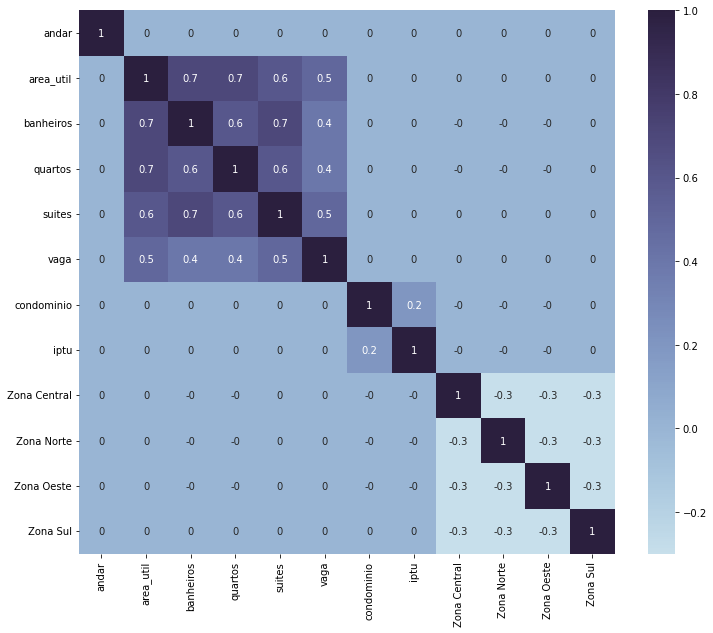

In [ ]:
cor = pd.DataFrame(correlacao.toArray(), columns=x, index=x)
# gráfico
plt.figure(figsize=(12,10))
paleta = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(cor.round(1), annot=True, cmap=paleta)

### **<font color=green>REGRESSÃO LINEAR**

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
treino, teste = df.randomSplit([0.7, 0.3], seed=101)

**Quantidade de dados separados por variável**

In [ ]:
print('Treino',treino.count())
print('Teste',teste.count())

Treino 184898
Teste 79430


In [ ]:
# Armazenar o modelo
LR = LinearRegression(maxIter=10, featuresCol='features',labelCol='label')
# Treinar usando o modelo
modelo_LR = LR.fit(df)
# Previsão da variável treinada
previsoes_lr_treino = modelo_LR.transform(df)
previsoes_lr_treino.show()

+--------------------+-------+------------------+
|            features|  label|        prediction|
+--------------------+-------+------------------+
|[3.0,43.0,1.0,2.0...|15000.0|231085.22055076167|
|[3.0,43.0,1.0,2.0...|15000.0|231085.22055076167|
|[3.0,43.0,1.0,2.0...|15000.0|231085.22055076162|
|[3.0,43.0,1.0,2.0...|15000.0|231085.22055076162|
|(12,[0,1,2,3,5,9]...|15000.0| 220619.6007065266|
|(12,[0,1,2,3,5,10...|15000.0| 220619.6007065266|
|(12,[0,1,2,3,5,8]...|15000.0| 220619.6007065266|
|(12,[0,1,2,3,5,11...|15000.0| 220619.6007065266|
|(12,[0,1,2,3,5,9]...|20000.0|210199.86910811742|
|(12,[0,1,2,3,5,10...|20000.0|210199.86910811742|
|(12,[0,1,2,3,5,8]...|20000.0|210199.86910811742|
|(12,[0,1,2,3,5,11...|20000.0|210199.86910811742|
|(12,[0,1,2,3,6,9]...|20000.0| 211286.0833353288|
|(12,[0,1,2,3,6,10...|20000.0| 211286.0833353288|
|(12,[0,1,2,3,6,8]...|20000.0| 211286.0833353288|
|(12,[0,1,2,3,6,11...|20000.0| 211286.0833353288|
|[2.0,43.0,1.0,2.0...|15000.0|231294.95949583943|


### **Métricas**

1. **R2** = O quanto o modelo está ajustado aos dados

2. **RMSE** = erro médio elevado ao quadrado e tirar a raiz, avalia os erros

**Resumo de treino**

In [ ]:
# Por se tratar de uma porcentagem, seu valor varia de 0 a 1.
resumo_treino = modelo_LR.summary 
resumo_treino.r2 

0.5954934783286314

In [ ]:
# 930898 erros (quanto menor melhor)
resumo_treino.rootMeanSquaredError  

933632.1455509542

**Score de teste**

In [ ]:
# 59% ajustado aos dados (igual ao treino)
resumo_teste = modelo_LR.evaluate(teste) 
resumo_teste.r2 

0.5943145718610775

In [ ]:
# 940035 erros (quanto menor melhor)
resumo_teste.rootMeanSquaredError

939917.0101526742

**Resumo do modelo**

In [ ]:
print('Linear Regression')
print('=' * 30)
print('Dados de Treino')
print('=' * 30)
print('R²: %f' % resumo_treino.r2)
print('RMSE: %f' % resumo_treino.rootMeanSquaredError)
print('='*30)
print('Dados de Teste')
print('=' * 30)
print('R²: %f' % resumo_teste.r2)
print('RMSE: %f' % resumo_teste.rootMeanSquaredError)

Linear Regression
Dados de Treino
R²: 0.595493
RMSE: 933632.145551
Dados de Teste
R²: 0.594315
RMSE: 939917.010153


### **<font color=blue>Árvore de Decisão**

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor(seed=101, maxDepth=7)
modelo_dtr = DTR.fit(treino)
previsoes_dtr_treino = modelo_dtr.transform(treino)
previsoes_dtr_treino.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(12,[0,1,2,3,4,8]...| 610000.0| 679194.7414634146|
|(12,[0,1,2,3,4,8]...| 791174.0| 679194.7414634146|
|(12,[0,1,2,3,4,8]...| 199000.0| 411945.5074751699|
|(12,[0,1,2,3,4,8]...| 434778.0| 411945.5074751699|
|(12,[0,1,2,3,4,8]...| 560000.0| 679194.7414634146|
|(12,[0,1,2,3,4,8]...|  73154.0|1918297.2857142857|
|(12,[0,1,2,3,4,8]...|1670000.0|1316642.0057673822|
|(12,[0,1,2,3,4,8]...|1860395.0|1643968.9492789656|
|(12,[0,1,2,3,4,8]...|7099000.0| 5637132.365062761|
|(12,[0,1,2,3,4,8]...| 425000.0| 679194.7414634146|
|(12,[0,1,2,3,4,8]...| 300000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 282000.0|1911723.9504286246|
|(12,[0,1,2,3,4,8]...|1200000.0|1316642.0057673822|
|(12,[0,1,2,3,4,8]...| 249000.0| 411945.5074751699|
|(12,[0,1,2,3,4,8]...| 750000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 400000.0|1316642.0057673822|
|(12,[0,1,2,

**Score do modelo**

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator()

# 76% ajustado aos dados (igual ao treino)
print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: 'r2'}))
# Quanto menor melhor
print(evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: 'rmse'}))

0.7609461393779278
716098.1201928913


**Previsões do modelo**

In [ ]:
previsoes_dtr_teste = modelo_dtr.transform(teste)
previsoes_dtr_teste.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(12,[0,1,2,3,4,8]...|1150000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 250000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 185000.0| 411945.5074751699|
|(12,[0,1,2,3,4,8]...| 850000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 290000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 949000.0|  926410.483667409|
|(12,[0,1,2,3,4,8]...| 265000.0| 679194.7414634146|
|(12,[0,1,2,3,4,8]...|1564938.0| 2794892.797349961|
|(12,[0,1,2,3,4,9]...| 434778.0| 411945.5074751699|
|(12,[0,1,2,3,4,9]...| 250000.0|  926410.483667409|
|(12,[0,1,2,3,4,9]...| 560000.0| 679194.7414634146|
|(12,[0,1,2,3,4,9]...| 300000.0|  926410.483667409|
|(12,[0,1,2,3,4,9]...| 249000.0| 411945.5074751699|
|(12,[0,1,2,3,4,9]...| 949000.0|  926410.483667409|
|(12,[0,1,2,3,4,9]...| 400000.0|1316642.0057673822|
|(12,[0,1,2,3,4,9]...| 265000.0| 679194.7414634146|
|(12,[0,1,2,

**Tabela de resumo**

In [ ]:
print('Decisão Tree Regression')
print('=' * 30)
print('Dados de Treino')
print('=' * 30)
print('R²: %f' % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: 'r2'}))
print('RMSE: %f' % evaluator.evaluate(previsoes_dtr_treino, {evaluator.metricName: 'rmse'}))
print('='*30)
print('Dados de Teste')
print('=' * 30)
print('R²: %f' % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: 'r2'}))
print('RMSE: %f' % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: 'rmse'}))

Decisão Tree Regression
Dados de Treino
R²: 0.760946
RMSE: 716098.120193
Dados de Teste
R²: 0.751286
RMSE: 735944.148880


### **<font color=red>Random Forest**

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

RFR = RandomForestRegressor(seed=101, maxDepth=7, numTrees=10)
modelo_rfr = RFR.fit(treino)

In [ ]:
previsoes_rfr_treino = modelo_rfr.transform(treino)
previsoes_rfr_treino.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(12,[0,1,2,3,4,8]...| 610000.0| 533740.9126258596|
|(12,[0,1,2,3,4,8]...| 791174.0| 533740.9126258596|
|(12,[0,1,2,3,4,8]...| 199000.0| 615571.8497517814|
|(12,[0,1,2,3,4,8]...| 434778.0|513833.45598946576|
|(12,[0,1,2,3,4,8]...| 560000.0| 533740.9126258596|
|(12,[0,1,2,3,4,8]...|  73154.0| 921323.6382351469|
|(12,[0,1,2,3,4,8]...|1670000.0|1197302.7101476733|
|(12,[0,1,2,3,4,8]...|1860395.0|1484847.5695317043|
|(12,[0,1,2,3,4,8]...|7099000.0| 5802133.455435687|
|(12,[0,1,2,3,4,8]...| 425000.0|  522088.067852648|
|(12,[0,1,2,3,4,8]...| 300000.0| 959507.9756566305|
|(12,[0,1,2,3,4,8]...| 282000.0| 1276547.569898319|
|(12,[0,1,2,3,4,8]...|1200000.0| 1023354.709238882|
|(12,[0,1,2,3,4,8]...| 249000.0| 531395.4992331776|
|(12,[0,1,2,3,4,8]...| 750000.0| 705331.8840351317|
|(12,[0,1,2,3,4,8]...| 400000.0|  1158092.73412177|
|(12,[0,1,2,

**Score de treino**

In [ ]:
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: 'r2'}))
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: 'rmse'}))

0.7566596450615625
722489.8020195218


**Score para teste**

In [ ]:
previsoes_rfr_teste = modelo_rfr.transform(teste)
previsoes_rfr_teste.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(12,[0,1,2,3,4,8]...|1150000.0| 710290.1961076874|
|(12,[0,1,2,3,4,8]...| 250000.0| 710290.1961076874|
|(12,[0,1,2,3,4,8]...| 185000.0| 598107.6083442919|
|(12,[0,1,2,3,4,8]...| 850000.0| 705331.8840351317|
|(12,[0,1,2,3,4,8]...| 290000.0| 705331.8840351317|
|(12,[0,1,2,3,4,8]...| 949000.0| 959507.9756566305|
|(12,[0,1,2,3,4,8]...| 265000.0|  522088.067852648|
|(12,[0,1,2,3,4,8]...|1564938.0| 1889515.518712048|
|(12,[0,1,2,3,4,9]...| 434778.0|513833.45598946576|
|(12,[0,1,2,3,4,9]...| 250000.0| 710290.1961076874|
|(12,[0,1,2,3,4,9]...| 560000.0| 533740.9126258596|
|(12,[0,1,2,3,4,9]...| 300000.0| 959507.9756566305|
|(12,[0,1,2,3,4,9]...| 249000.0| 531395.4992331776|
|(12,[0,1,2,3,4,9]...| 949000.0| 959507.9756566305|
|(12,[0,1,2,3,4,9]...| 400000.0|  1158092.73412177|
|(12,[0,1,2,3,4,9]...| 265000.0|  522088.067852648|
|(12,[0,1,2,

**Tabela de resumo**

In [ ]:
print('Random Forest Regression')
print('=' * 30)
print('Dados de Treino')
print('=' * 30)
print('R²: %f' % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: 'r2'}))
print('RMSE: %f' % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: 'rmse'}))
print('='*30)
print('Dados de Teste')
print('=' * 30)
print('R²: %f' % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: 'r2'}))
print('RMSE: %f' % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: 'rmse'}))

Random Forest Regression
Dados de Treino
R²: 0.756660
RMSE: 722489.802020
Dados de Teste
R²: 0.748420
RMSE: 740172.220825


### **<font color=navy>Cross Validation**

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# passar parâmetros
# testando a profundidade da árvore
# quantidade de vezes que monta os nó
grid = ParamGridBuilder()\
  .addGrid(DTR.maxDepth, [2,5,10])\
  .addGrid(DTR.maxBins, [10,32,45])\
  .build()

In [ ]:
# Avaliador
evaluator = RegressionEvaluator()

In [ ]:
dtr_cv = CrossValidator(
    estimator = DTR,
    estimatorParamMaps = grid,
    evaluator = evaluator,
    numFolds = 3,   # numero de tentativas
    seed = 101
)

In [ ]:
modelo_dtr_cv = dtr_cv.fit(treino)

In [ ]:
previsoes_dtr_cv_teste = modelo_dtr_cv.transform(teste)

**Fazendo a comparação do modelo com ou sem o validador**

In [ ]:
print('Árvore de Decisão')
print('=' * 30)
print('Sem Cross Validation')
print('=' * 30)
print('R²: %f' % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: 'r2'}))
print('RMSE: %f' % evaluator.evaluate(previsoes_dtr_teste, {evaluator.metricName: 'rmse'}))
print('='*30)
print('Com Cross Validation')
print('=' * 30)
print('R²: %f' % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: 'r2'}))
print('RMSE: %f' % evaluator.evaluate(previsoes_dtr_cv_teste, {evaluator.metricName: 'rmse'}))

Árvore de Decisão
Sem Cross Validation
R²: 0.751286
RMSE: 735944.148880
Com Cross Validation
R²: 0.816913
RMSE: 631427.295579


## **Prever resultados**

In [ ]:
dados.show(5)

+-----+---------+---------+-------+------+----+----------+----+-------+------------+----------+----------+--------+
|andar|area_util|banheiros|quartos|suites|vaga|condominio|iptu|  label|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+-----+---------+---------+-------+------+----+----------+----+-------+------------+----------+----------+--------+
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           0|         1|         0|       0|
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           0|         0|         1|       0|
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           1|         0|         0|       0|
|    3|     43.0|        1|      2|     0|   1|     245.0| 0.0|15000.0|           0|         0|         0|       1|
|    2|     42.0|        1|      2|     0|   1|       0.0| 0.0|15000.0|           0|         1|         0|       0|
+-----+---------+---------+-------+------+----+----------+----+-------+-

**Visualizar as variáveis do dataset, para criar dados novos de um imóvel**

In [ ]:
dados.columns

['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'label',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [ ]:
imovel_1 = [{
    'andar': 2,
    'area_util':43.0,
    'banheiros':1,
    'quartos':2,
    'suites':1,
    'vaga':1,
    'condominio':120,
    'iptu':0.0,
    'label':0,
    'Zona Central':0,
    'Zona Norte':0,
    'Zona Oeste':1,
    'Zona Sul':0
}]

**Criar um dataframe com as características criadas**

In [ ]:
imovel = SP.createDataFrame(imovel_1)
imovel.show()

+------------+----------+----------+--------+-----+---------+---------+----------+----+-----+-------+------+----+
|Zona Central|Zona Norte|Zona Oeste|Zona Sul|andar|area_util|banheiros|condominio|iptu|label|quartos|suites|vaga|
+------------+----------+----------+--------+-----+---------+---------+----------+----+-----+-------+------+----+
|           0|         0|         1|       0|    2|     43.0|        1|       120| 0.0|    0|      2|     1|   1|
+------------+----------+----------+--------+-----+---------+---------+----------+----+-----+-------+------+----+



**Visualizar as variáveis explicativas**

In [ ]:
x

['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

**inputCols=x (variáveis explicativas),  outputCol = 'features' (nome a receber)**

In [ ]:
assembler = VectorAssembler(inputCols=x, outputCol='features')

**valor do imovel ta '0', porque quero descobrir esse valor pela máquina**


In [ ]:
meu_lar = assembler.transform(imovel).select('features', 'label')
meu_lar.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[2.0,43.0,1.0,2.0...|    0|
+--------------------+-----+



**Vou usar Árvore de Decisão com Cross Validation, obteve o melhor resultado do treinamento**

In [ ]:
# Valor do imóvel com estas caracteríticas, custa: R$302.591,31
modelo_dtr_cv.transform(meu_lar).show()

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|[2.0,43.0,1.0,2.0...|    0|302591.3114446529|
+--------------------+-----+-----------------+

